# <u> HR Analytics Employee Attrition & Performance Final Project </u>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# <u> 1. Data Set Description <u>

<ul>
<li> <b> df </b>is a dataset of employee attrition data. Each row is an employee attrition and revelant working information,such as daily rate , department and education etc. </li>


Important columns in df are:

Age: Employee's age From 18 to 60 years old.
Attrition: the employee that left the company or not.
BusinessTravel:3 categories: Not Travel, Rare, or frequently
Daily Rate: the amount of money that employee receive per day
Department: the department that an employee works for.
DistanceFromHome: distance of miles from company to employee's home.
Education:5 categories:Below College,College,Bachelor,Master,Doctor.
# EmployeeCount: To Be Delete?
EmployeeNumber: The ID number of the employee.
EnvironmentSatisfaction: Satisfaction rating from 1 to 4.
Gender: Male or Female.
HourlyRate: the amount of money that employee receive per hour
JobInvolvement:4 categories:Low,Medium,High,Very High
JobLevel:5 categories from 1 to 5. 1 means lower level job.
JobRole:The job title of the employee, such as sales executive, research director.
JobSatisfaction:4 categories:Low,Medium,High,Very High.
MaritalStatus:3 categories:Single, Married or Divorced.
MonthlyIncome: the amount of money that employee receives. 
MonthlyRate:the amount of money that employee receives per month.
NumCompaniesWorked:
# Over18: To Be Delete? All cells are "Yes".
OverTime: the employee works overtime or not.
PercentSalaryHike: the % change in salary from 2016 vs 2015.
PerformanceRating:4 categories:Low,Good,Excellent,Outstanding.
RelationshipSatisfaction:4 categories:Low,Medium,High,Very High.
# StandardHours:To Be Delete? All cells are 80
StockOptionLevel:3 categories: how much company stocks option employee own. 
TotalWorkingYears: number of years of employee's working experience.
TrainingTimesLastYear: number of time of training the employee had in 2016
WorkLifeBalance:4 categories:Bad,Good,Better,Best.
YearsAtCompany: number of years that employee works at IBM.
YearsInCurrentRole: number of years in the current job role.
YearsSinceLastPromotion: number of years since employee's last promotion.
YearsWithCurrManager: number of years that employee has worked for the same manager.


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
len(df)

1470

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check Null  in the dataset

In [5]:
pd.isnull(df).sum() > 0

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

# <u> 2. Data Preparation </u>

## Turn the depenent variable "Attrition" into the binary variable

In [6]:
df['Attrition'] = (df['Attrition'] == 'Yes')*1.0
df['Attrition'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

## Check the Balance Situation of the depenent variable,"Attrition", in this dataset

In [7]:
df.Attrition.mean()

0.16122448979591836

## The attrition rate of the company is 16%. The dataset is imblanced. Many statistical techniques have been put forth to treat imbalances in data (oversampling or undersampling). In this notebook, we consider to use an oversampling technique known as SMOTE to treat this imbalance.

## Turn some important attributes into the binary variables

In [8]:
df['Gender'] = (df['Gender'] == 'Male')*1.0
df['Over18'] = (df['Over18'] == 'Y')*1.0
df['OverTime'] = (df['OverTime'] == 'Yes')*1.0

## Turn some important attibutions into dummy variables

In [9]:
df = pd.get_dummies(df,columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1.0,1102,1,2,1,1,2,0.0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0.0,279,8,1,1,2,3,1.0,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1.0,1373,2,2,1,4,4,1.0,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0.0,1392,3,4,1,5,4,0.0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0.0,591,2,1,1,7,1,1.0,40,...,1,0,0,0,0,0,0,0,1,0


## Check those variables that only have one unique value

In [10]:
df.nunique().nsmallest(2)

EmployeeCount    1
Over18           1
dtype: int64

## Considered these three attributes, employmentCount ,StandardHours and Over18, have only one unique value. These three variables are not useful to our analysis on Attrition. We decide to drop them.

In [11]:
df = df.drop(['EmployeeCount','StandardHours','Over18'],axis=1)

## Check the correlation of the attribute and see if we can avoid redudant variables

In [18]:
cor=df.corr()
cor.stack()
cor[cor<1].stack().nlargest(10)[::2]

JobLevel                    MonthlyIncome              0.950300
Department_Human Resources  JobRole_Human Resources    0.904983
Department_Sales            JobRole_Sales Executive    0.808869
JobLevel                    TotalWorkingYears          0.782208
PercentSalaryHike           PerformanceRating          0.773550
dtype: float64

## Since the Department of Human Resources and Sales are highly correlated to Job Role and the Job Level are highly correletd to Monthly Income,  we would like to drop the 3 variables, Job Level , Department of Human Resources and Department of Sales to avoid duplicated information.

In [19]:
numerical1 =[u'Age', u'Attrition', u'DailyRate', u'DistanceFromHome', u'Education',
       u'EmployeeNumber', u'EnvironmentSatisfaction', u'Gender', u'HourlyRate',
       u'JobInvolvement', u'JobLevel', u'JobSatisfaction', u'MonthlyIncome',
       u'MonthlyRate', u'NumCompaniesWorked', u'OverTime',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears', u'TrainingTimesLastYear',
       u'WorkLifeBalance', u'YearsAtCompany', u'YearsInCurrentRole',
       u'YearsSinceLastPromotion', u'YearsWithCurrManager',
       u'BusinessTravel_Non-Travel', u'BusinessTravel_Travel_Frequently',
       u'BusinessTravel_Travel_Rarely', u'Department_Human Resources',
       u'Department_Research & Development', u'Department_Sales',
       u'EducationField_Human Resources', u'EducationField_Life Sciences',
       u'EducationField_Marketing', u'EducationField_Medical',
       u'EducationField_Other', u'EducationField_Technical Degree',
       u'JobRole_Healthcare Representative', u'JobRole_Human Resources',
       u'JobRole_Laboratory Technician', u'JobRole_Manager',
       u'JobRole_Manufacturing Director', u'JobRole_Research Director',
       u'JobRole_Research Scientist', u'JobRole_Sales Executive',
       u'JobRole_Sales Representative', u'MaritalStatus_Divorced',
       u'MaritalStatus_Married', u'MaritalStatus_Single']
data = [go.Heatmap(
        z= df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,)]

layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

# <u> 3. Interesting Finding Summary </u>

# <u> 4. Machine Learning: Clustering </u>

Splitting Data into Train and Test sets

In [20]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [21]:
X = df.drop(['Attrition'],axis=1)
Y = df.Attrition

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_test_split(X,Y,test_size=0.3,random_state = 0)

[      Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
 338    30        570                 5          3             456   
 363    33        350                 5          3             485   
 759    45        788                24          4            1049   
 793    28        895                15          2            1102   
 581    30        921                 1          3             806   
 320    27       1377                 2          3             437   
 452    45        561                 2          3             606   
 195    37        290                21          3             267   
 776    20        769                 9          3            1077   
 1295   41        796                 4          1            1815   
 70     59       1225                 1          1              91   
 1135   46        563                 1          4            1602   
 1011   36       1174                 3          4            1425   
 10     35        80

In [24]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.3,random_state = 0)

In [26]:
len(X_test)

441

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
cl.predict(X_test)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [31]:
(cl.predict(X_test) == Y_test).mean()

0.854875283446712

In [32]:
y_pred = cl.predict(X_test)

In [33]:
y_pred[:20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [34]:
cl.predict_proba(X_test)

array([[0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.9, 0.1],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.7, 0.3],
       [1. , 0. ],
       [0.2, 0.8],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.3, 0.7],
       [1. ,

In [35]:
cl.predict_proba(X_test)[:,1]

array([0.2, 0.1, 0. , 0.1, 0.7, 0.4, 0.1, 0.1, 0.1, 0.2, 0. , 0.2, 0.2,
       0.4, 0.1, 0. , 0.2, 0.1, 0. , 0.1, 0.3, 0.2, 0. , 0. , 0.3, 0.2,
       0. , 0. , 0.7, 0.1, 0.3, 0.4, 0. , 0. , 0.2, 0.1, 0.4, 0. , 0. ,
       0.3, 0.4, 0.1, 0.2, 0. , 0. , 0.4, 0.3, 0. , 0.8, 0.5, 0.3, 0.7,
       0. , 0.2, 0.7, 0.1, 0.2, 0.2, 0. , 0.3, 0.1, 0. , 0.2, 0.1, 0.4,
       0. , 0.5, 0.3, 0. , 0.2, 0.1, 0.6, 0.2, 0. , 0. , 0. , 0. , 0. ,
       0.5, 0.1, 0. , 0.1, 0.2, 0.2, 0.1, 0. , 0.1, 0.4, 0.1, 0.1, 0.6,
       0.2, 0.1, 0.1, 0. , 0. , 0. , 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1,
       0.1, 0. , 0.2, 0.2, 0.3, 0.1, 0.2, 0.2, 0. , 0. , 0.2, 0.1, 0.1,
       0. , 0. , 0. , 0.1, 0.1, 0. , 0.7, 0.1, 0.1, 0.1, 0. , 0. , 0.1,
       0. , 0.2, 0.4, 0.5, 0.4, 0.1, 0.4, 0.1, 0. , 0.3, 0. , 0.2, 0.2,
       0. , 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0. , 0. , 0.1, 0.3, 0.1,
       0.2, 0.4, 0.2, 0.1, 0.2, 0. , 0.5, 0.6, 0. , 0.3, 0.2, 0.1, 0. ,
       0.4, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0. , 0.4, 0. , 0.2, 0.

In [37]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [38]:
y_pred_proba[:20]

array([0.2, 0.1, 0. , 0.1, 0.7, 0.4, 0.1, 0.1, 0.1, 0.2, 0. , 0.2, 0.2,
       0.4, 0.1, 0. , 0.2, 0.1, 0. , 0.1])

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[364,   7],
       [ 57,  13]])

Accuracy

In [40]:
(y_pred == Y_test).mean()

0.854875283446712

Precision

In [42]:
import sklearn.metrics as met
met.precision_score(Y_test,y_pred)

0.65

In [43]:
Y_test.mean()

0.15873015873015872

Recall

In [44]:
met.recall_score(Y_test,y_pred)

0.18571428571428572

AUC Score

In [45]:
met.roc_auc_score(Y_test,y_pred_proba)

0.7354254909510973

Cross-validation

In [46]:
from sklearn.model_selection import KFold
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
avgCV_AUC = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,\
                                                    scoring='roc_auc').mean()
avgCV_AUC

0.7455407268472235

Which classifier obtains the highest performance?

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [48]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.5993362435724654
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.7590087993715191
GaussianNB(priors=None) 0.7712844518862669
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs

Try Decision Tree

In [55]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [56]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

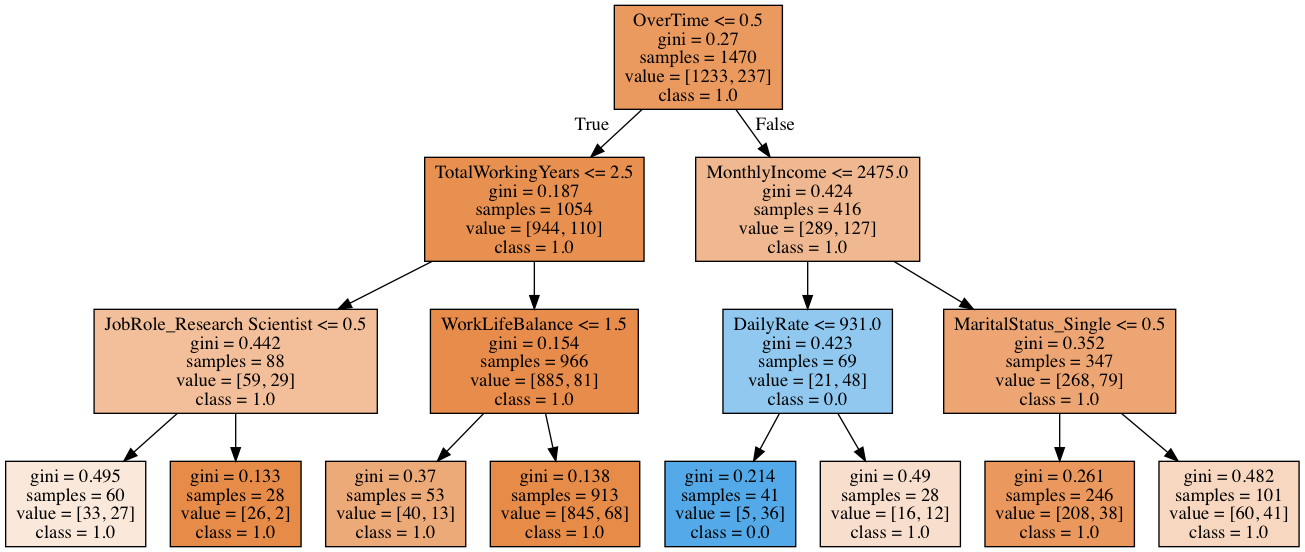

In [57]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# <u> 5. Validity of the Finding </u>

# <u> 6.  Managerial Insights</u>